In [3]:
import pandas as pd
import numpy as np
# import seaborn as sns
import math
# import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# from matplotlib import colors
# import hydrobr
# import geobr
import geopandas as gpd

In [4]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = '10'

In [5]:
def correlation_coefficient_pearson(observed_pr, estimated_pr):
    correlation_matrix = np.corrcoef(observed_pr, estimated_pr)
    correlation_coefficient = correlation_matrix[0, 1]
    return correlation_coefficient

In [6]:
def bias(observed_pr, estimated_pr):
    return np.mean(np.array(estimated_pr) - np.array(observed_pr))

In [7]:
def compound_relative_error(observed_pr, estimated_pr):
    numerator = np.sum((np.array(estimated_pr) - np.array(observed_pr))**2)
    avg_actual = np.mean(observed_pr)
    denominator = np.sum((np.array(observed_pr) - avg_actual)**2)
    cre = (numerator / denominator)
    return cre

In [8]:
def mean_absolute_error(observed_pr, estimated_pr):
    absolute_errors = np.abs(np.array(estimated_pr) - np.array(observed_pr))
    mae = np.mean(absolute_errors)
    return mae

In [9]:
def rmse(observed_pr, estimated_pr):
    return np.sqrt(np.mean((np.array(estimated_pr) - np.array(observed_pr))**2))

In [10]:
def factorCalculate(df):
    a = df['Factor_A'].sum()
    b = df['Factor_B'].sum()
    c = df['Factor_C'].sum()
    d = df['Factor_D'].sum()
    return a, b, c, d

In [ ]:
def csiCalculate(a, b, c):
    return a / (a + b + c)

In [11]:
def pcCalculate(a, b, c, d):
    return (a + d) / (a + b + c + d)

# 1961-2024

In [28]:
df = pd.read_hdf('./1 - Organized data gauge/BRAZIL/DATASETS/BRAZIL_DAILY_1961_2024_QC.h5', key = 'table_crossvalidation')
# df = df[df['datetime']>='2021-01-01']
df

,gauge_code,datetime,interpolated_rain_mm,rain_mm
0,00048000,1961-01-01,0.0,0.0
1,02150059,1961-01-01,2.5,1.0
2,02150061,1961-01-01,10.2,0.0
3,01744010,1961-01-01,6.8,12.4
4,02554001,1961-01-01,0.0,0.0
...,...,...,...,...
4624,A563,2024-12-31,15.9,7.8
4625,75900000,2024-12-31,0.0,0.0
4626,14530000,2024-12-31,0.0,0.0
4627,314530701A,2024-12-31,1.1,1.6


In [32]:
df_info = pd.read_hdf('./1 - Organized data gauge/BRAZIL/DATASETS/BRAZIL_DAILY_1961_2024_QC.h5', key = 'table_info')
df_info

,name_station,gauge_code,city,state,responsible,source,state_abbreviation,lat,long
18980,SANTA RITA DO PARDO | S716,S716,SANTA RITA DO PARDO,MATO GROSSO DO SUL,INMET,INMET,MS,-21.305889,-52.820375
18979,RIBAS DO RIO PARDO | S715,S715,RIBAS DO RIO PARDO,MATO GROSSO DO SUL,INMET,INMET,MS,-20.466694,-53.763028
18978,PEDRO GOMES | S714,S714,PEDRO GOMES,MATO GROSSO DO SUL,INMET,INMET,MS,-18.072778,-54.548889
18976,NOVA ALVORADA DO SUL | S712,S712,NOVA ALVORADA DO SUL,MATO GROSSO DO SUL,INMET,INMET,MS,-21.450972,-54.341972
18975,LAGUNA CARAPA | S711,S711,LAGUNA CARAPA,MATO GROSSO DO SUL,INMET,INMET,MS,-22.575389,-55.160333
...,...,...,...,...,...,...,...,...,...
4,MARUDA,00047005,MARAPANIM,PARÁ,ANA,HIDROWEB,PA,-0.633600,-47.658300
3,PRIMAVERA,00047004,PRIMAVERA,PARÁ,ANA,HIDROWEB,PA,-0.929400,-47.099400
2,CURUÇA,00047003,CURUÇA,PARÁ,ANA,HIDROWEB,PA,-0.737500,-47.853600
1,SALINÓPOLIS,00047002,SALINÓPOLIS,PARÁ,ANA,HIDROWEB,PA,-0.623100,-47.353600


In [36]:
df_data_teste = df[df['datetime'].isin(['2011-01-01', '2013-02-08'])]
df_data_teste = df_data_teste[['gauge_code', 'datetime', 'interpolated_rain_mm', 'rain_mm']]
df_data_teste

C:\Users\linde\AppData\Local\Temp\ipykernel_9900\2588153840.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_data_teste = df[df['datetime'].isin(['2011-01-01', '2013-02-08'])]


,gauge_code,datetime,interpolated_rain_mm,rain_mm
0,00738012,2011-01-01,0.0,0.0
1,02352029,2011-01-01,0.0,0.0
2,00661000,2011-01-01,9.0,0.0
3,02748017,2011-01-01,0.8,3.5
4,02449044,2011-01-01,0.0,0.0
...,...,...,...,...
4215,00738052,2013-02-08,0.0,0.0
4216,02249103,2013-02-08,16.4,49.3
4217,02041020,2013-02-08,0.0,0.0
4218,02652009,2013-02-08,0.0,0.0


In [39]:
df_output = pd.merge(df_data_teste, df_info[['gauge_code', 'city', 'state_abbreviation', 'lat', 'long']], on = 'gauge_code', how  ='left')
df_output.to_hdf('./5 - Results/df_output.h5', key = 'table_data', complevel=9, mode='w', encoding='utf-8')
df_output.to_csv('./5 - Results/df_output.csv')
df_output

,gauge_code,datetime,interpolated_rain_mm,rain_mm,city,state_abbreviation,lat,long
0,00738012,2011-01-01,0.0,0.0,BOA VENTURA,PB,-7.4000,-38.2167
1,02352029,2011-01-01,0.0,0.0,PEABIRU,PR,-23.9108,-52.3361
2,00661000,2011-01-01,9.0,0.0,HUMAITÁ,AM,-6.2478,-61.8392
3,02748017,2011-01-01,0.8,3.5,PAULO LOPES,SC,-27.9622,-48.6692
4,02449044,2011-01-01,0.0,0.0,SENGES,PR,-24.1000,-49.4667
...,...,...,...,...,...,...,...,...
8586,00738052,2013-02-08,0.0,0.0,BARRO,CE,-7.0500,-38.7000
8587,02249103,2013-02-08,16.4,49.3,LENÇÓIS PAULISTA,SP,-22.7397,-49.0308
8588,02041020,2013-02-08,0.0,0.0,DOMINGOS MARTINS,ES,-20.3667,-41.0611
8589,02652009,2013-02-08,0.0,0.0,BOM SUCESSO DO SUL,PR,-26.0506,-52.8008


In [31]:
df['year'] = df['datetime'].dt.year.astype(int)
df_station = df[(df['gauge_code'] == '00651001')
                & (df['year'] == 2013)
                ]
df_station.head(60)
# df

,gauge_code,datetime,interpolated_rain_mm,rain_mm,year
2566,00651001,2013-01-01,4.2,0.0,2013
1146,00651001,2013-01-02,1.6,0.0,2013
2171,00651001,2013-01-03,11.1,0.0,2013
2649,00651001,2013-01-04,0.1,0.0,2013
1970,00651001,2013-01-05,0.0,2.7,2013
3701,00651001,2013-01-06,10.8,0.0,2013
780,00651001,2013-01-07,0.2,0.0,2013
3698,00651001,2013-01-08,2.4,0.0,2013
895,00651001,2013-01-09,5.9,0.0,2013
1455,00651001,2013-01-10,6.5,0.0,2013


<Axes: xlabel='datetime'>

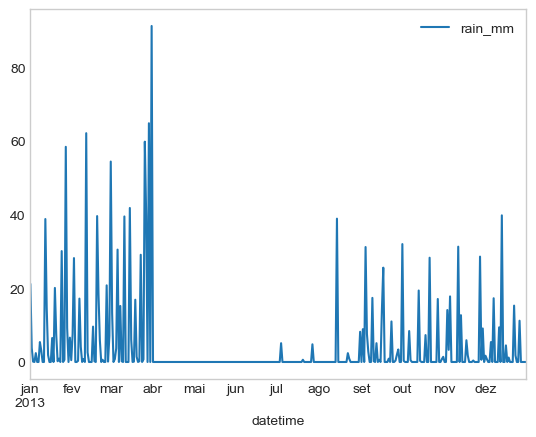

In [30]:
df_station.plot(x = 'datetime', y = 'rain_mm')

In [ ]:
df_test = df[df['datetime'] == "2013-02-08"]
df_test.sort_values(['rain_mm'], inplace=True)
df_test

NameError: name 'df' is not defined

In [12]:
# Initialize a new column 'wet_days' with zeros
df['wet_days'] = False
df['wet_days_interpolated'] = False

# Calculate 'wet_days' every time 'rain_mm' is greater than 0.5
df.loc[df['rain_mm'] >= 0.5, 'wet_days'] = True
df.loc[df['interpolated_rain_mm'] >= 0.5, 'wet_days_interpolated'] = True

df['Factor_A'] = 0
df.loc[((df['wet_days'] == True) & (df['wet_days_interpolated'] == True)), 'Factor_A'] = 1

df['Factor_B'] = 0
df.loc[((df['wet_days'] == False) & (df['wet_days_interpolated'] == True)), 'Factor_B'] = 1

df['Factor_C'] = 0
df.loc[((df['wet_days'] == True) & (df['wet_days_interpolated'] == False)), 'Factor_C'] = 1

df['Factor_D'] = 0
df.loc[((df['wet_days'] == False) & (df['wet_days_interpolated'] == False)), 'Factor_D'] = 1

# General Statistics

In [13]:
observed_pr = df['rain_mm'].values.tolist()
estimated_pr = df['interpolated_rain_mm'].values.tolist()
correlation_coefficient = correlation_coefficient_pearson(observed_pr, estimated_pr)
rmse_rain_mm = rmse(observed_pr, estimated_pr)
bias_rain_mm = bias(observed_pr, estimated_pr)
cre = compound_relative_error(observed_pr, estimated_pr)
mae = mean_absolute_error(observed_pr, estimated_pr)
a, b, c, d = factorCalculate(df)
csi = csiCalculate(a, b, c)
pc = pcCalculate(a, b, c, d)

print(F"Pearson Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"Bias: {bias_rain_mm:.3f}")
print(f"RMSE: {rmse_rain_mm:.3f}")
print(f"Compound Relative Error (CRE): {cre:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"PC: {pc:.3f}")
print(f"CSI: {csi:.3f}")

Pearson Correlation Coefficient: 0.623
Bias: 0.002
RMSE: 8.635
Compound Relative Error (CRE): 0.649
Mean Absolute Error (MAE): 3.246
PC: 0.791
CSI: 0.516


In [14]:
# Pearson Correlation Coefficient: 0.860
# Bias: -0.002577
# RMSE: 5.502
# Compound Relative Error (CRE): 0.265
# Mean Absolute Error (MAE): 2.060
# PC: 0.824
# CSI: 0.585



# 1961 a 2024

# Pearson Correlation Coefficient: 0.623
# Bias: 0.002
# RMSE: 8.635
# Compound Relative Error (CRE): 0.649
# Mean Absolute Error (MAE): 3.246
# PC: 0.791
# CSI: 0.516


# 1960 a 2020

# Pearson Correlation Coefficient: 0.622
# Bias: 0.002
# RMSE: 8.606
# Compound Relative Error (CRE): 0.649
# Mean Absolute Error (MAE): 3.277
# PC: 0.788
# CSI: 0.509


# 2021 a 2024
# Pearson Correlation Coefficient: 0.632
# Bias: 0.006
# RMSE: 9.026
# Compound Relative Error (CRE): 0.652
# Mean Absolute Error (MAE): 2.824
# PC: 0.831
# CSI: 0.604




# R: Pearson Correlation Coefficient

## 1961 to 2024

In [15]:
observed_pr = df['rain_mm']
estimated_pr = df['interpolated_rain_mm']

correlation_coefficient = correlation_coefficient_pearson(observed_pr, estimated_pr)
print("Pearson Correlation Coefficient:", correlation_coefficient)

Pearson Correlation Coefficient: 0.6228885310799742


In [16]:
df_date = df[df['datetime'] == '1961-01-01']

observed_pr = df_date['rain_mm'].values.tolist()
estimated_pr = df_date['interpolated_rain_mm'].values.tolist()

correlation_coefficient = correlation_coefficient_pearson(observed_pr, estimated_pr)
print("Pearson Correlation Coefficient:", correlation_coefficient)

Pearson Correlation Coefficient: 0.49017388697815995


In [17]:
correlation_result = df.groupby('datetime')[['rain_mm', 'interpolated_rain_mm']].corr().iloc[0::2, -1].reset_index()
correlation_result = correlation_result[['datetime', 'interpolated_rain_mm']]
# Rename columns for clarity
correlation_result.columns = ['datetime', 'pearson_correlation']

# Extract the year from the 'datetime' column
correlation_result['year'] = correlation_result['datetime'].dt.year

# Calculate the order of each day within its respective year
correlation_result['day_order'] = correlation_result.groupby('year')['datetime'].rank().astype(int)

correlation_result.sort_values(['year', 'day_order'], inplace=True)

correlation_result

,datetime,pearson_correlation,year,day_order
0,1961-01-01,0.490174,1961,1
1,1961-01-02,0.558598,1961,2
2,1961-01-03,0.503232,1961,3
3,1961-01-04,0.613977,1961,4
4,1961-01-05,0.570060,1961,5
...,...,...,...,...
23371,2024-12-27,0.730418,2024,362
23372,2024-12-28,0.565264,2024,363
23373,2024-12-29,0.377365,2024,364
23374,2024-12-30,0.344450,2024,365


In [18]:
correlation_result.sort_values(['pearson_correlation'])

,datetime,pearson_correlation,year,day_order
22147,2021-08-21,0.015512,2021,233
22148,2021-08-22,0.019930,2021,234
23264,2024-09-11,0.024370,2024,255
4222,1972-07-24,0.026005,1972,206
23297,2024-10-14,0.032607,2024,288
...,...,...,...,...
16313,2005-08-31,0.902286,2005,243
14062,1999-07-03,0.903330,1999,184
13431,1997-10-10,0.905260,1997,283
19164,2013-06-21,0.905419,2013,172


In [19]:
correlation_result['pearson_correlation'].mean()

0.5311665843597384

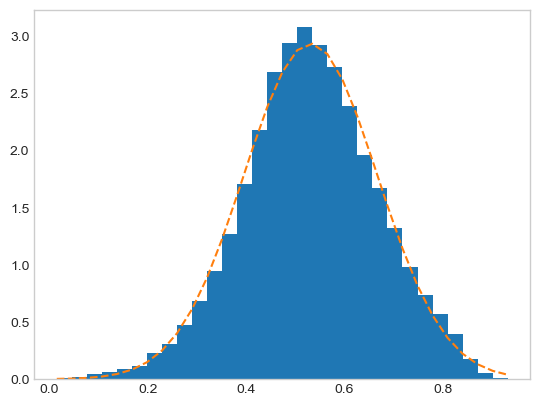

In [20]:
num_bins=30
fig, ax = plt.subplots()
mu = correlation_result['pearson_correlation'].mean()
n, bins, patches = ax.hist(correlation_result['pearson_correlation'], num_bins, density=True)
sigma = std_deviation = correlation_result['pearson_correlation'].std()
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

In [21]:
correlation_result['pearson_correlation'].round(3).max()

0.932

In [22]:
pivot_df = correlation_result.pivot_table(index='year', columns='day_order', values='pearson_correlation', aggfunc='first')

# Convert the pivot DataFrame to a NumPy array
correlation_numpy_array = pivot_df.to_numpy()
correlation_numpy_array = np.nan_to_num(correlation_numpy_array)

# Display the NumPy array
correlation_numpy_array

array([[0.49017389, 0.55859847, 0.50323178, ..., 0.54474401, 0.53184914,
        0.        ],
       [0.68392768, 0.4185719 , 0.44531713, ..., 0.70558265, 0.65777766,
        0.        ],
       [0.69530952, 0.64614583, 0.38389964, ..., 0.3908782 , 0.33708548,
        0.        ],
       ...,
       [0.58126651, 0.46783603, 0.49520228, ..., 0.60811729, 0.59625712,
        0.        ],
       [0.50531789, 0.49302763, 0.39550575, ..., 0.43615425, 0.54451461,
        0.        ],
       [0.64557909, 0.64718101, 0.64606811, ..., 0.37736484, 0.34444975,
        0.49290347]])

## DOY

In [23]:
df_calendar = correlation_result[['datetime', "day_order"]]
df_calendar

,datetime,day_order
0,1961-01-01,1
1,1961-01-02,2
2,1961-01-03,3
3,1961-01-04,4
4,1961-01-05,5
...,...,...
23371,2024-12-27,362
23372,2024-12-28,363
23373,2024-12-29,364
23374,2024-12-30,365


In [24]:
df_merge_doy = pd.merge(df[['datetime', 'rain_mm', 'interpolated_rain_mm']], df_calendar, on = 'datetime')
df_merge_doy['year'] = df_merge_doy['datetime'].dt.year
df_merge_doy

,datetime,rain_mm,interpolated_rain_mm,day_order,year
0,1961-01-01,0.0,0.0,1,1961
1,1961-01-01,1.0,2.5,1,1961
2,1961-01-01,0.0,10.2,1,1961
3,1961-01-01,12.4,6.8,1,1961
4,1961-01-01,0.0,0.0,1,1961
...,...,...,...,...,...
107414663,2024-12-31,7.8,15.9,366,2024
107414664,2024-12-31,0.0,0.0,366,2024
107414665,2024-12-31,0.0,0.0,366,2024
107414666,2024-12-31,1.6,1.1,366,2024


In [25]:
correlation_result_doy = df_merge_doy.groupby('day_order')[['rain_mm', 'interpolated_rain_mm']].corr().iloc[0::2, -1].reset_index()
correlation_result_doy = correlation_result_doy[['day_order', 'interpolated_rain_mm']]

# Rename columns for clarity
correlation_result_doy.columns = ['day_order', 'pearson_correlation']

correlation_result_doy.sort_values(['day_order'], inplace=True)

correlation_result_doy

,day_order,pearson_correlation
0,1,0.577716
1,2,0.596374
2,3,0.625231
3,4,0.607257
4,5,0.600958
...,...,...
361,362,0.570142
362,363,0.590762
363,364,0.575436
364,365,0.515628


## year

In [26]:
df['year'] = df['datetime'].dt.year
correlation_result_year = df.groupby('year')[['rain_mm', 'interpolated_rain_mm']].corr().iloc[0::2, -1].reset_index()
correlation_result_year = correlation_result_year[['year', 'interpolated_rain_mm']]
# Rename columns for clarity
correlation_result_year.columns = ['year', 'pearson_correlation']
correlation_result_year

,year,pearson_correlation
0,1961,0.597265
1,1962,0.594768
2,1963,0.564052
3,1964,0.549483
4,1965,0.582402
...,...,...
59,2020,0.534825
60,2021,0.646032
61,2022,0.655848
62,2023,0.594616


## Chart

In [27]:
x = correlation_result['day_order'].drop_duplicates().values.tolist()
y = correlation_result['year'].drop_duplicates().values.tolist()
z_min, z_max = np.min(correlation_numpy_array), np.max(correlation_numpy_array)
print(x)
print(y)
print(z_min)
print(z_max)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [28]:
z_min_doy, z_max_doy = np.min(correlation_result_doy['pearson_correlation'].values.tolist()), np.max(correlation_result_doy['pearson_correlation'].values.tolist())
print(z_min_doy)
print(z_max_doy)

0.48360339581188017
0.7530901341762477


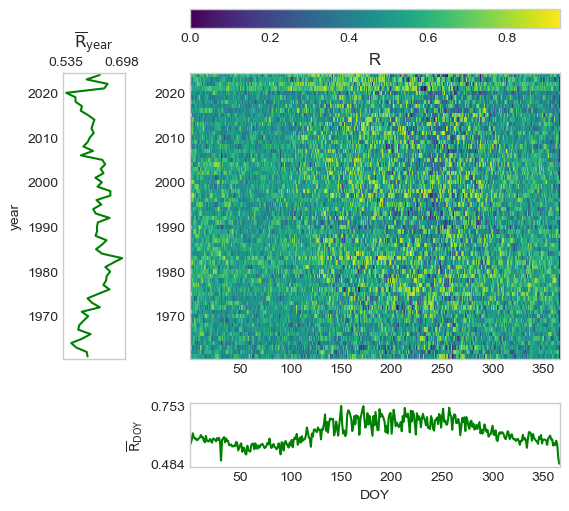

In [29]:
fig = plt.figure(figsize=(5.5,6))
gs = gridspec.GridSpec(3,2, width_ratios=[1,6], height_ratios=[4,9,2])

# Subplot in the top-left (a[0,0])
ax00 = plt.subplot(gs[1, 0])
ax00.plot(correlation_result_year['pearson_correlation'], correlation_result_year['year'], color = 'green')
ax00.xaxis.tick_top()
ax00.set_xticks([round(min(correlation_result_year['pearson_correlation']),3), round(max(correlation_result_year['pearson_correlation']),3)])
ax00.set_xticklabels([min(ax00.get_xticks()), max(ax00.get_xticks())])
ax00.set_title(r'$\overline{\mathrm{R}}_{\text{year}}$')
ax00.set_ylabel(r'year')

# Subplot in the top-right (a[0,1])
ax01 = plt.subplot(gs[1, 1], sharey=ax00)
pcm = ax01.pcolormesh(x, y, correlation_numpy_array, cmap='viridis')
ax01.set_title('R')


# Subplot in the bottom-right (a[1,1])
ax11 = plt.subplot(gs[2, 1], sharex=ax01)
ax11.plot(correlation_result_doy['day_order'], correlation_result_doy['pearson_correlation'], color = 'green')
ax11.set_yticks([round(min(correlation_result_doy['pearson_correlation']),3), round(max(correlation_result_doy['pearson_correlation']),3)])
ax11.set_yticklabels([min(ax11.get_yticks()), max(ax11.get_yticks())])
ax11.set_ylabel(r'$\overline{\mathrm{R}}_{\text{DOY}}$')
ax11.set_xlabel('DOY')

# Subplot in the bottom-left (a[1,0])
ax02 = plt.subplot(gs[0, 1], sharey=ax11)
ax02.set_visible(False)

cbar = plt.colorbar(pcm, ax = ax02, location = 'bottom')

plt.tight_layout(pad = 0.01)
plt.savefig('./figures/cross_validation_R.tiff',  dpi=300, transparent=False, bbox_inches=None)
plt.show()
plt.close()

# BIAS

## 1961 to 2024

In [30]:
observed_pr = df['rain_mm'].values.tolist()
estimated_pr = df['interpolated_rain_mm'].values.tolist()
bias = round(np.mean(np.array(observed_pr) - np.array(estimated_pr)), 4)

# Display the result
print("Bias:", bias)

Bias: -0.0019


In [31]:
df_date = df[df['datetime'] == '1961-01-01']

observed_pr = df_date['rain_mm'].values.tolist()
estimated_pr = df_date['interpolated_rain_mm'].values.tolist()
bias = round(np.mean(np.array(observed_pr) - np.array(estimated_pr)), 4)

# Display the result
print("Bias for 1961-01-01:", bias)

Bias for 1961-01-01: -0.0221


In [32]:
bias_result = df.groupby('datetime').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()
bias_result.columns = ['datetime', 'Bias']

# Extract the year from the 'datetime' column
bias_result['year'] = bias_result['datetime'].dt.year

# Calculate the order of each day within its respective year
bias_result['day_order'] = bias_result.groupby('year')['datetime'].rank().astype(int)

bias_result.sort_values(['year', 'day_order'], inplace=True)

bias_result

C:\Users\linde\AppData\Local\Temp\ipykernel_14400\1781646571.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bias_result = df.groupby('datetime').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()


,datetime,Bias,year,day_order
0,1961-01-01,-0.022061,1961,1
1,1961-01-02,-0.042309,1961,2
2,1961-01-03,0.130057,1961,3
3,1961-01-04,-0.258095,1961,4
4,1961-01-05,0.101649,1961,5
...,...,...,...,...
23371,2024-12-27,-0.051454,2024,362
23372,2024-12-28,-0.114195,2024,363
23373,2024-12-29,0.016148,2024,364
23374,2024-12-30,-0.017477,2024,365


In [33]:
bias_result['Bias'].mean()

-0.002154579168843441

In [46]:
bias_result['Bias'].min()

-0.373986975397974

In [47]:
bias_result['Bias'].max()

0.3974279835390946

-0.002154579168843441 -0.374 0.3974


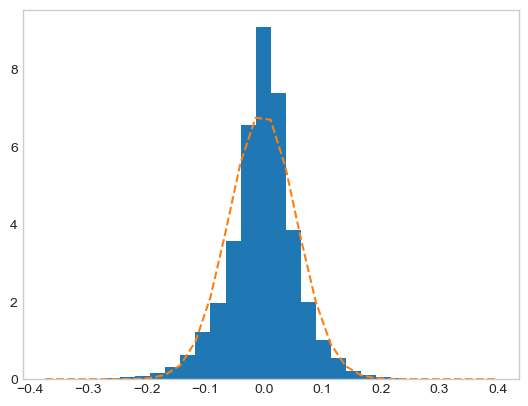

In [34]:
num_bins=30
fig, ax = plt.subplots()
mu = bias_result['Bias'].mean()
n, bins, patches = ax.hist(bias_result['Bias'], num_bins, density=True)
sigma = std_deviation = bias_result['Bias'].std()
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
print(bias_result['Bias'].mean(), bias_result['Bias'].round(4).min(), bias_result['Bias'].round(4).max())

In [35]:
pivot_df = bias_result.pivot_table(index='year', columns='day_order', values='Bias', aggfunc='first')

# Convert the pivot DataFrame to a NumPy array
bias_numpy_array = pivot_df.to_numpy()
bias_numpy_array = np.nan_to_num(bias_numpy_array)

print(len(bias_numpy_array), len(bias_numpy_array[0]), len(bias_numpy_array) * len(bias_numpy_array[0]))
bias_numpy_array

64 366 23424


array([[-0.0220613 , -0.04230899,  0.13005722, ..., -0.1061245 ,
         0.07784471,  0.        ],
       [-0.15806652,  0.10372902, -0.07750155, ..., -0.02019171,
        -0.13253944,  0.        ],
       [-0.04128391, -0.158942  ,  0.03721805, ..., -0.036252  ,
         0.04795618,  0.        ],
       ...,
       [-0.10363744, -0.0149823 ,  0.046875  , ...,  0.0544135 ,
        -0.02401884,  0.        ],
       [-0.0070172 , -0.08609502, -0.05538818, ..., -0.13627816,
         0.01934787,  0.        ],
       [-0.1418643 , -0.25654052, -0.1590797 , ...,  0.01614827,
        -0.01747698,  0.05044286]])

## DOY

In [36]:
bias_result_doy = df_merge_doy.copy(deep=True)
bias_result_doy = bias_result_doy.groupby('day_order').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()

# Rename columns for clarity
bias_result_doy.columns = ['day_order', 'Bias']
bias_result_doy.sort_values(['day_order'], inplace=True)

bias_result_doy

C:\Users\linde\AppData\Local\Temp\ipykernel_14400\1388580973.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bias_result_doy = bias_result_doy.groupby('day_order').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()


,day_order,Bias
0,1,0.003081
1,2,0.000771
2,3,0.001784
3,4,0.002749
4,5,-0.012879
...,...,...
361,362,-0.007053
362,363,-0.025992
363,364,-0.012780
364,365,-0.006261


In [37]:
z_min_doy, z_max_doy = np.min(bias_result_doy['Bias'].values.tolist()), np.max(bias_result_doy['Bias'].values.tolist())
print(z_min_doy)
print(z_max_doy)

-0.02804342198484932
0.017611300204220554


## year

In [38]:
bias_result_year = df_merge_doy.copy(deep=True)
bias_result_year = bias_result_year.groupby('year').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()
bias_result_year.columns = ['year', 'Bias']
bias_result_year

C:\Users\linde\AppData\Local\Temp\ipykernel_14400\3560072139.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bias_result_year = bias_result_year.groupby('year').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()


,year,Bias
0,1961,-0.005677
1,1962,-0.011390
2,1963,-0.012638
3,1964,-0.016541
4,1965,-0.008204
...,...,...
59,2020,-0.002802
60,2021,-0.010441
61,2022,0.009466
62,2023,-0.008288


In [39]:
z_min_year, z_max_year = np.min(bias_result_year['Bias'].values.tolist()), np.max(bias_result_year['Bias'].values.tolist())
print(z_min_year)
print(z_max_year)

-0.0165412253772469
0.013880571642000317


## Chart

In [40]:
x = bias_result['day_order'].drop_duplicates().values.tolist()
y = bias_result['year'].drop_duplicates().values.tolist()
z_min, z_max = np.min(bias_numpy_array), np.max(bias_numpy_array)
print(x)
print(y)
print(z_min)
print(z_max)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

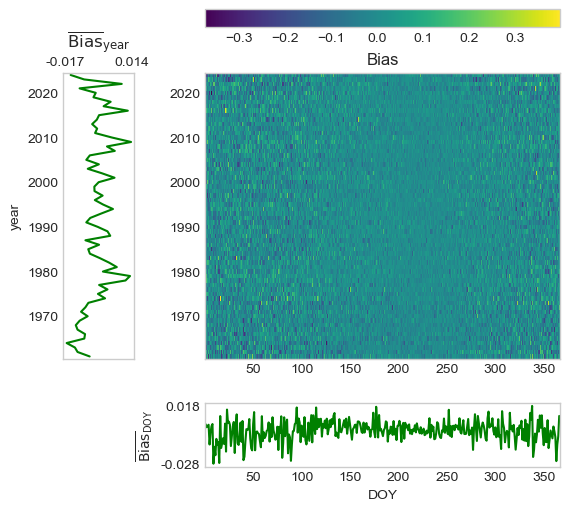

In [41]:
fig = plt.figure(figsize=(5.5,6))
gs = gridspec.GridSpec(3,2, width_ratios=[2,10], height_ratios=[4,9,2])

# Subplot in the top-left (a[0,0])
ax00 = plt.subplot(gs[1, 0])
ax00.plot(bias_result_year['Bias'], bias_result_year['year'], color = 'green')
ax00.xaxis.tick_top()
ax00.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
ax00.set_xticklabels([min(ax00.get_xticks()), max(ax00.get_xticks())])
ax00.set_title(r'$\overline{\mathrm{Bias}}_{\text{year}}$')
ax00.set_ylabel(r'year')

# Subplot in the top-right (a[0,1])
ax01 = plt.subplot(gs[1, 1], sharey=ax00)
pcm = ax01.pcolormesh(x, y, bias_numpy_array, cmap='viridis')
ax01.set_title('Bias')


# Subplot in the bottom-right (a[1,1])
ax11 = plt.subplot(gs[2, 1], sharex=ax01)
ax11.plot(bias_result_doy['day_order'], bias_result_doy['Bias'], color = 'green')
ax11.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
ax11.set_yticklabels([min(ax11.get_yticks()), max(ax11.get_yticks())])
ax11.set_ylabel(r'$\overline{\mathrm{Bias}}_{\text{DOY}}$')
ax11.set_xlabel('DOY')

# Subplot in the bottom-left (a[1,0])
ax02 = plt.subplot(gs[0, 1], sharey=ax11)
ax02.set_visible(False)

cbar = plt.colorbar(pcm, ax = ax02, location = 'bottom')
plt.tight_layout(pad = 0.01)
plt.savefig('./figures/cross_validation_Bias.tiff', format='tiff', dpi=300, transparent=False, bbox_inches=None)
plt.show()
plt.close()

# RMSE

## 1961 to 2020

In [42]:
observed_pr = df['rain_mm'].values.tolist()
estimated_pr = df['interpolated_rain_mm'].values.tolist()
rmse = round(np.sqrt(np.mean((np.array(observed_pr) - np.array(estimated_pr))**2)), 3)

# Display the result
print("RMSE:", rmse)

RMSE: 8.635


In [43]:
df_date = df[df['datetime'] == '1961-01-01']

observed_pr = df_date['rain_mm'].values.tolist()
estimated_pr = df_date['interpolated_rain_mm'].values.tolist()
rmse = round(np.sqrt(np.mean((np.array(observed_pr) - np.array(estimated_pr))**2)), 3)

# Display the result
print("RMSE for 1961-01-01:", rmse)

RMSE for 1961-01-01: 14.911


In [44]:
rmse_result = df.groupby('datetime').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()
rmse_result.columns = ['datetime', 'RMSE']

# Extract the year from the 'datetime' column
rmse_result['year'] = rmse_result['datetime'].dt.year

# Calculate the order of each day within its respective year
rmse_result['day_order'] = rmse_result.groupby('year')['datetime'].rank().astype(int)

rmse_result.sort_values(['year', 'day_order'], inplace=True)

rmse_result

C:\Users\linde\AppData\Local\Temp\ipykernel_14400\562509079.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_result = df.groupby('datetime').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()


,datetime,RMSE,year,day_order
0,1961-01-01,14.911370,1961,1
1,1961-01-02,15.236188,1961,2
2,1961-01-03,14.260007,1961,3
3,1961-01-04,13.892685,1961,4
4,1961-01-05,11.927306,1961,5
...,...,...,...,...
23371,2024-12-27,11.734774,2024,362
23372,2024-12-28,9.170422,2024,363
23373,2024-12-29,15.519432,2024,364
23374,2024-12-30,13.787218,2024,365


In [45]:
rmse_result['RMSE'].mean()

8.020337970128793

In [48]:
rmse_result['RMSE'].min()

0.876750726989901

In [49]:
rmse_result['RMSE'].max()

25.598955076833857

8.020337970128793 0.877 25.599


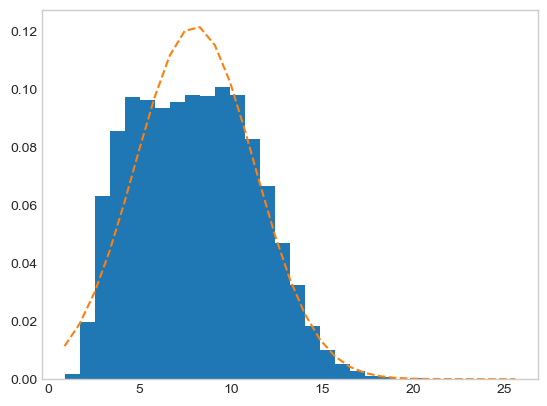

In [44]:
num_bins=30
fig, ax = plt.subplots()
mu = rmse_result['RMSE'].mean()
n, bins, patches = ax.hist(rmse_result['RMSE'], num_bins, density=True)
sigma = std_deviation = rmse_result['RMSE'].std()
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
print(rmse_result['RMSE'].mean(), rmse_result['RMSE'].round(3).min(), rmse_result['RMSE'].round(3).max())

In [45]:
pivot_df = rmse_result.pivot_table(index='year', columns='day_order', values='RMSE', aggfunc='first')

# Convert the pivot DataFrame to a NumPy array
rmse_numpy_array = pivot_df.to_numpy()
rmse_numpy_array = np.nan_to_num(rmse_numpy_array)

# Display the NumPy array
print(len(rmse_numpy_array), len(rmse_numpy_array[0]), len(rmse_numpy_array) * len(rmse_numpy_array[0]))
rmse_numpy_array

64 366 23424


array([[14.91137002, 15.23618819, 14.26000685, ..., 11.71784829,
         8.81264532,  0.        ],
       [ 7.37598726,  7.25415549,  9.82804456, ..., 14.08370605,
        14.16731873,  0.        ],
       [13.60016936, 10.53920319,  7.25780072, ..., 11.27987686,
        12.17222249,  0.        ],
       ...,
       [11.31380069, 12.22744812, 16.58690598, ..., 10.81515835,
         9.37568145,  0.        ],
       [ 8.68165629, 14.23990335, 14.3184457 , ..., 13.6612426 ,
        10.01429846,  0.        ],
       [11.99659993, 11.61496388, 13.18830344, ..., 15.51943227,
        13.78721817,  8.35653728]])

## DOY

In [46]:
rmse_result_doy = df_merge_doy.copy(deep=True)
rmse_result_doy = rmse_result_doy.groupby('day_order').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()

# Rename columns for clarity
rmse_result_doy.columns = ['day_order', 'RMSE']
rmse_result_doy.sort_values(['day_order'], inplace=True)

rmse_result_doy

C:\Users\linde\AppData\Local\Temp\ipykernel_7816\2630438679.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_result_doy = rmse_result_doy.groupby('day_order').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()


,day_order,RMSE
0,1,10.889468
1,2,11.345411
2,3,11.203217
3,4,11.104777
4,5,10.933230
...,...,...
361,362,11.024896
362,363,10.785386
363,364,10.858509
364,365,11.716120


In [47]:
z_min_doy, z_max_doy = np.min(rmse_result_doy['RMSE'].values.tolist()), np.max(rmse_result_doy['RMSE'].values.tolist())
print(z_min_doy)
print(z_max_doy)

3.9367682670905872
12.461558469030951


## year

In [48]:
rmse_result_year = df_merge_doy.copy(deep=True)
rmse_result_year = rmse_result_year.groupby('year').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()
rmse_result_year.columns = ['year', 'RMSE']
rmse_result_year.tail(10)

C:\Users\linde\AppData\Local\Temp\ipykernel_7816\4197010518.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_result_year = rmse_result_year.groupby('year').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()


,year,RMSE
54,2015,8.866152
55,2016,9.051220
56,2017,9.129383
57,2018,9.132303
58,2019,9.000884
59,2020,10.120406
60,2021,8.403109
61,2022,9.027935
62,2023,9.427428
63,2024,9.173259


In [49]:
z_min_year, z_max_year = np.min(rmse_result_year['RMSE'].values.tolist()), np.max(rmse_result_year['RMSE'].values.tolist())
print(z_min_year)
print(z_max_year)

7.894805205886279
10.120406176162387


## Chart

In [50]:
x = rmse_result['day_order'].drop_duplicates().values.tolist()
y = rmse_result['year'].drop_duplicates().values.tolist()
z_min, z_max = np.min(rmse_numpy_array), np.max(rmse_numpy_array)
print(x)
print(y)
print(z_min)
print(z_max)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

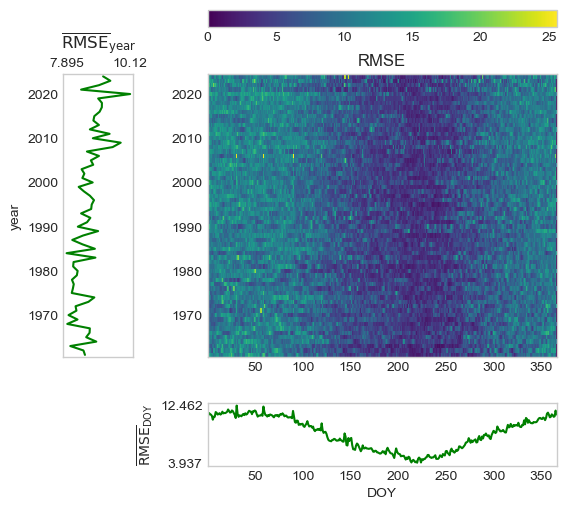

In [51]:
fig = plt.figure(figsize=(5.5,6))
gs = gridspec.GridSpec(3,2, width_ratios=[2,10], height_ratios=[4,9,2])

# Subplot in the top-left (a[0,0])
ax00 = plt.subplot(gs[1, 0])
ax00.plot(rmse_result_year['RMSE'], rmse_result_year['year'], color = 'green')
ax00.xaxis.tick_top()
ax00.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
ax00.set_xticklabels([min(ax00.get_xticks()), max(ax00.get_xticks())])
ax00.set_title(r'$\overline{\mathrm{RMSE}}_{\text{year}}$')
ax00.set_ylabel(r'year')

# Subplot in the top-right (a[0,1])
ax01 = plt.subplot(gs[1, 1], sharey=ax00)
pcm = ax01.pcolormesh(x, y, rmse_numpy_array, cmap='viridis')
ax01.set_title('RMSE')



# Subplot in the bottom-right (a[1,1])
ax11 = plt.subplot(gs[2, 1], sharex=ax01)
ax11.plot(rmse_result_doy['day_order'], rmse_result_doy['RMSE'], color = 'green')
ax11.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
ax11.set_yticklabels([min(ax11.get_yticks()), max(ax11.get_yticks())])
ax11.set_ylabel(r'$\overline{\mathrm{RMSE}}_{\text{DOY}}$')
ax11.set_xlabel('DOY')

# Subplot in the bottom-left (a[1,0])
ax02 = plt.subplot(gs[0, 1], sharey=ax11)
ax02.set_visible(False)

cbar = plt.colorbar(pcm, ax = ax02, location = 'bottom')

plt.tight_layout(pad = 0.1)
plt.savefig('./figures/cross_validation_RMSE.tiff', dpi=300, transparent=False, bbox_inches=None)
plt.show()
plt.close()

# Combined Metrics

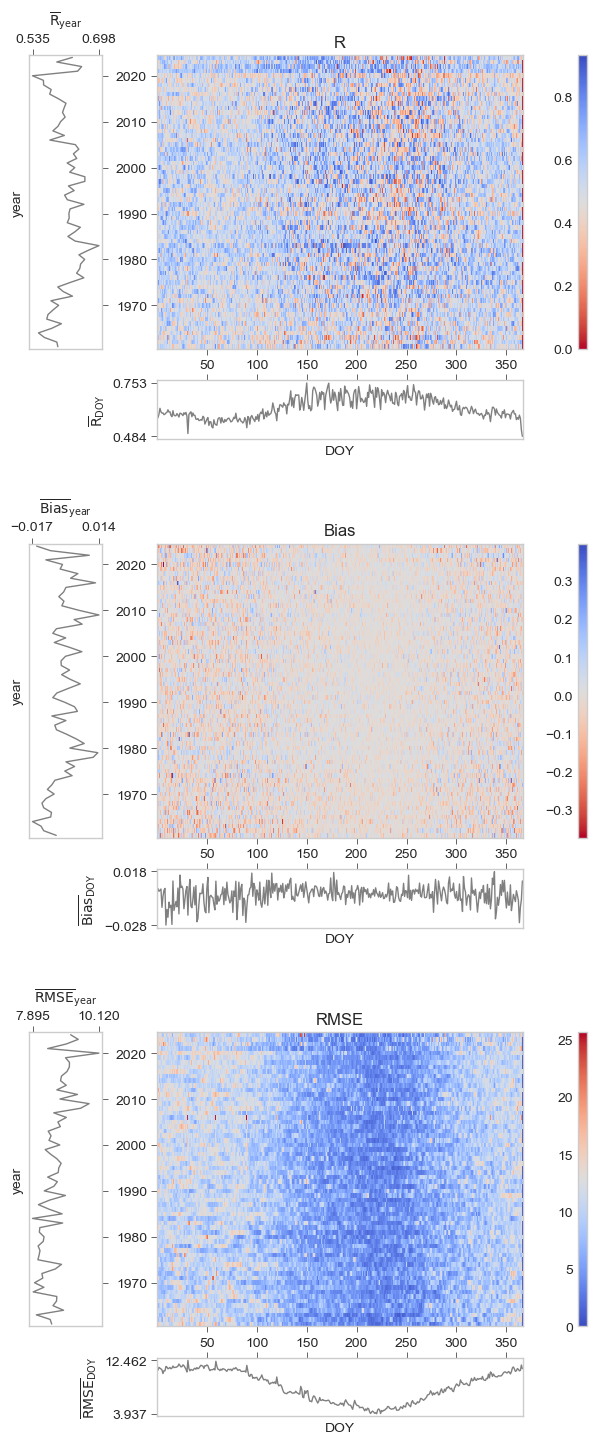

In [55]:
# Create figure with 3 rows (one for each metric)
fig = plt.figure(figsize=(5.5, 15))  # Slightly wider figure to accommodate the colorbar
gs_main = gridspec.GridSpec(3, 1)  # 3 rows, 1 column for metrics

# Rename columns to match metric names
correlation_result_year = correlation_result_year.rename(columns={'pearson_correlation': 'R'})
correlation_result_doy = correlation_result_doy.rename(columns={'pearson_correlation': 'R'})

# Define metrics (replace with your data)
metrics = [
    {'name': 'R', 'result_year': correlation_result_year, 'result_doy': correlation_result_doy, 'array': correlation_numpy_array},
    {'name': 'Bias', 'result_year': bias_result_year, 'result_doy': bias_result_doy, 'array': bias_numpy_array},
    {'name': 'RMSE', 'result_year': rmse_result_year, 'result_doy': rmse_result_doy, 'array': rmse_numpy_array}
]

cmap = ['coolwarm_r', 'coolwarm_r', 'coolwarm']

for i, metric in enumerate(metrics):

    z_min_doy, z_max_doy = np.min(metric['result_doy'][metric['name']].values.tolist()), np.max(metric['result_doy'][metric['name']].values.tolist())
    z_min_year, z_max_year = np.min(metric['result_year'][metric['name']].values.tolist()), np.max(metric['result_year'][metric['name']].values.tolist())

    # Create nested GridSpec for each metric (3 rows, 3 columns)
    # Column 0: Year plot (left)
    # Column 1: Heatmap (middle)
    # Column 2: Colorbar (right)
    gs_sub = gridspec.GridSpecFromSubplotSpec(
        3, 3,  # 3 rows, 3 columns
        subplot_spec=gs_main[i],  # Assign to current metric row
        width_ratios=[2, 10, 0.25],  # Adjust width ratios: more space for heatmap, less for colorbar
        height_ratios=[4, 10, 2],  # Keep height ratios the same
        wspace=0.37,  # Increase horizontal spacing between subplots
        hspace=0.2   # Increase vertical spacing between subplots
    )

    # Year plot (left)
    ax_left = fig.add_subplot(gs_sub[1, 0])
    ax_left.plot(metric['result_year'][metric['name']]
                 , metric['result_year']['year']
                 , color='grey'
                 , linewidth = 1)
    ax_left.xaxis.tick_top()
    ax_left.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
    ax_left.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=False, length=4, width=0.5)
    ax_left.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True, length=4, width=0.5)
    ax_left.set_title(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{year}}}}$', fontsize = 10)
    ax_left.set_ylabel('year')

    # Main heatmap (middle)
    ax_main = fig.add_subplot(gs_sub[1, 1], sharey=ax_left)
    pcm = ax_main.pcolormesh(x, y, metric['array'], cmap=cmap[i])
    ax_main.set_title(metric['name'])
    # Ensure ticks are shown on both axes
    ax_main.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=4, width=0.5)
    ax_main.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)

    # DOY plot (bottom)
    ax_bottom = fig.add_subplot(gs_sub[2, 1], sharex=ax_main)
    ax_bottom.plot(metric['result_doy']['day_order']
                   , metric['result_doy'][metric['name']]
                   , color='grey'
                   , linewidth = 1)
    ax_bottom.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
    ax_bottom.set_ylabel(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{DOY}}}}$')
    ax_bottom.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom = False, labeltop=False, length=4, width=0.5)
    ax_bottom.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)
    ax_bottom.set_xlabel('DOY')



    # Colorbar (right)
    ax_cbar = fig.add_subplot(gs_sub[1, 2])  # Place colorbar in the right column
    cbar = plt.colorbar(pcm, cax=ax_cbar, location = 'left')  # Add colorbar to the right of the heatmap
    # cbar.set_label(metric['name'])  # Add a label to the colorbar

# Adjust layout with more padding
plt.tight_layout(pad=-1)  # Increase padding around the subplots
plt.savefig('./figures/crossvalidationstacked_metrics.tiff', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\linde\AppData\Local\Temp\ipykernel_7816\2045995234.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2)  # Increase padding around the subplots


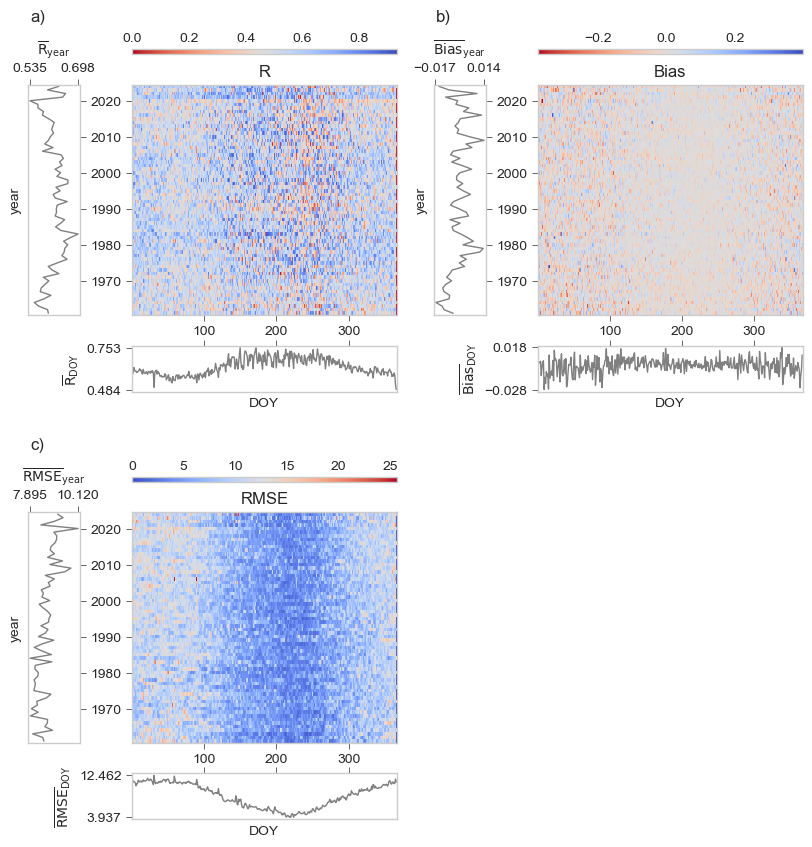

In [ ]:
# Create figure with 2 rows and 2 columns
fig = plt.figure(figsize=(10, 10))  # Adjust figure size for 2x2 layout
gs_main = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.25)  # 2 rows, 2 columns for metrics

# Rename columns to match metric names
correlation_result_year = correlation_result_year.rename(columns={'pearson_correlation': 'R'})
correlation_result_doy = correlation_result_doy.rename(columns={'pearson_correlation': 'R'})

# Define metrics (replace with your data)
metrics = [
    {'name': 'R', 'result_year': correlation_result_year, 'result_doy': correlation_result_doy, 'array': correlation_numpy_array},
    {'name': 'Bias', 'result_year': bias_result_year, 'result_doy': bias_result_doy, 'array': bias_numpy_array},
    {'name': 'RMSE', 'result_year': rmse_result_year, 'result_doy': rmse_result_doy, 'array': rmse_numpy_array}
]

cmap = ['coolwarm_r', 'coolwarm_r', 'coolwarm']
letters = ['a', 'b', 'c']

for i, metric in enumerate(metrics):
    z_min_doy, z_max_doy = np.min(metric['result_doy'][metric['name']].values.tolist()), np.max(metric['result_doy'][metric['name']].values.tolist())
    z_min_year, z_max_year = np.min(metric['result_year'][metric['name']].values.tolist()), np.max(metric['result_year'][metric['name']].values.tolist())

    # Create nested GridSpec for each metric (3 rows, 3 columns)
    # Column 0: Year plot (left)
    # Column 1: Heatmap (middle)
    # Column 2: Colorbar (right)
    gs_sub = gridspec.GridSpecFromSubplotSpec(
        3, 2,  # 3 rows, 3 columns
        subplot_spec=gs_main[i // 2, i % 2],  # Assign to current metric position in 2x2 grid
        width_ratios=[2, 10],  # Adjust width ratios: more space for heatmap, less for colorbar
        height_ratios=[0.2, 10, 2],  # Keep height ratios the same
        wspace=0.325,  # Increase horizontal spacing between subplots
        hspace=0.325   # Increase vertical spacing between subplots
    )

    # Year plot (left)
    ax_left = fig.add_subplot(gs_sub[1, 0])
    ax_left.plot(metric['result_year'][metric['name']]
                 , metric['result_year']['year']
                 , color='grey'
                 , linewidth=1)
    ax_left.xaxis.tick_top()
    ax_left.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
    ax_left.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=False, length=4, width=0.5)
    ax_left.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True, length=4, width=0.5)
    ax_left.set_title(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{year}}}}$', fontsize=10)
    ax_left.set_ylabel('year')

    # Main heatmap (middle)
    ax_main = fig.add_subplot(gs_sub[1, 1], sharey=ax_left)
    pcm = ax_main.pcolormesh(x, y, metric['array'], cmap=cmap[i])
    ax_main.set_title(metric['name'])
    # Ensure ticks are shown on both axes
    ax_main.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=4, width=0.5)
    ax_main.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)

    # DOY plot (bottom)
    ax_bottom = fig.add_subplot(gs_sub[2, 1], sharex=ax_main)
    ax_bottom.plot(metric['result_doy']['day_order']
                   , metric['result_doy'][metric['name']]
                   , color='grey'
                   , linewidth=1)
    ax_bottom.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
    ax_bottom.set_ylabel(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{DOY}}}}$')
    ax_bottom.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=False, length=4, width=0.5)
    ax_bottom.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)
    ax_bottom.set_xlabel('DOY')

        # Add letter annotation in the top-left corner
    ax_left.text(min(metric['result_year'][metric['name']]), 2042, f"{letters[i]})", fontsize=12)

    # Colorbar (right)
    ax_cbar = fig.add_subplot(gs_sub[0, 1])  # Place colorbar in the right column
    cbar = plt.colorbar(pcm, cax=ax_cbar, orientation = 'horizontal', location='top')  # Add colorbar to the right of the heatmap

# Adjust layout with more padding
plt.tight_layout(pad=2)  # Increase padding around the subplots
plt.savefig('./figures/crossvalidation_stacked_metrics_2_by_2.tiff', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\linde\AppData\Local\Temp\ipykernel_7816\32528786.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2)  # Increase padding around the subplots


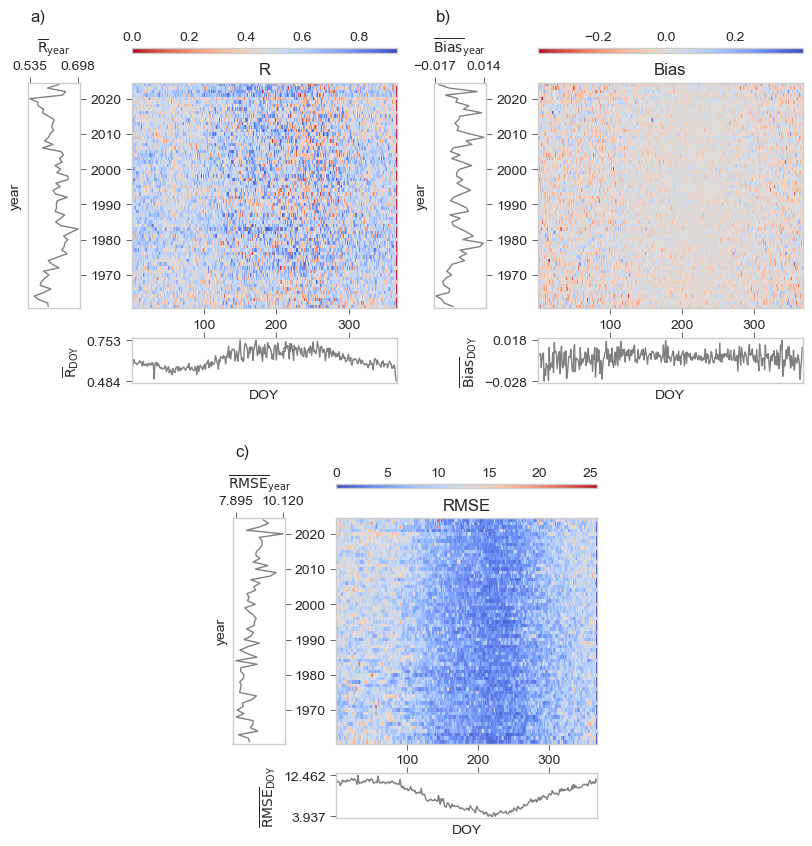

In [ ]:
# Create figure with 2 rows and 1 column
fig = plt.figure(figsize=(10, 10))  # Adjust figure size for 1x2 layout
gs_main = gridspec.GridSpec(2, 1, hspace=0.3)  # 2 rows, 1 column

# Rename columns to match metric names
correlation_result_year = correlation_result_year.rename(columns={'pearson_correlation': 'R'})
correlation_result_doy = correlation_result_doy.rename(columns={'pearson_correlation': 'R'})

# Define metrics (replace with your data)
metrics = [
    {'name': 'R', 'result_year': correlation_result_year, 'result_doy': correlation_result_doy, 'array': correlation_numpy_array},
    {'name': 'Bias', 'result_year': bias_result_year, 'result_doy': bias_result_doy, 'array': bias_numpy_array},
    {'name': 'RMSE', 'result_year': rmse_result_year, 'result_doy': rmse_result_doy, 'array': rmse_numpy_array}
]

cmap = ['coolwarm_r', 'coolwarm_r', 'coolwarm']
letters = ['a', 'b', 'c']

# First row: R and Bias side by side
gs_row1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_main[0], wspace=0.1)

for i, metric in enumerate(metrics[:2]):  # Only plot R and Bias in the first row
    z_min_doy, z_max_doy = np.min(metric['result_doy'][metric['name']].values.tolist()), np.max(metric['result_doy'][metric['name']].values.tolist())
    z_min_year, z_max_year = np.min(metric['result_year'][metric['name']].values.tolist()), np.max(metric['result_year'][metric['name']].values.tolist())

    # Create nested GridSpec for each metric (3 rows, 2 columns)
    gs_sub = gridspec.GridSpecFromSubplotSpec(
        3, 2,  # 3 rows, 2 columns
        subplot_spec=gs_row1[i],  # Assign to current metric position in the first row
        width_ratios=[2, 10],  # Adjust width ratios: more space for heatmap, less for colorbar
        height_ratios=[0.2, 10, 2],  # Keep height ratios the same
        wspace=0.325,  # Increase horizontal spacing between subplots
        hspace=0.325   # Increase vertical spacing between subplots
    )

    # Year plot (left)
    ax_left = fig.add_subplot(gs_sub[1, 0])
    ax_left.plot(metric['result_year'][metric['name']]
                 , metric['result_year']['year']
                 , color='grey'
                 , linewidth=1)
    ax_left.xaxis.tick_top()
    ax_left.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
    ax_left.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=False, length=4, width=0.5)
    ax_left.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True, length=4, width=0.5)
    ax_left.set_title(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{year}}}}$', fontsize=10)
    ax_left.set_ylabel('year')

    # Main heatmap (middle)
    ax_main = fig.add_subplot(gs_sub[1, 1], sharey=ax_left)
    pcm = ax_main.pcolormesh(x, y, metric['array'], cmap=cmap[i])
    ax_main.set_title(metric['name'])
    # Ensure ticks are shown on both axes
    ax_main.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=4, width=0.5)
    ax_main.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)

    # DOY plot (bottom)
    ax_bottom = fig.add_subplot(gs_sub[2, 1], sharex=ax_main)
    ax_bottom.plot(metric['result_doy']['day_order']
                   , metric['result_doy'][metric['name']]
                   , color='grey'
                   , linewidth=1)
    ax_bottom.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
    ax_bottom.set_ylabel(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{DOY}}}}$')
    ax_bottom.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=False, length=4, width=0.5)
    ax_bottom.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)
    ax_bottom.set_xlabel('DOY')

    # Add letter annotation in the top-left corner
    ax_left.text(min(metric['result_year'][metric['name']]), 2042, f"{letters[i]})", fontsize=12)

    # Colorbar (right)
    ax_cbar = fig.add_subplot(gs_sub[0, 1])  # Place colorbar in the right column
    cbar = plt.colorbar(pcm, cax=ax_cbar, orientation='horizontal', location='top')  # Add colorbar to the right of the heatmap

# Second row: Divide into three columns with RMSE in the middle
gs_row2 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs_main[1], width_ratios=[1, 2, 1], wspace=0.1)

# Empty left subplot
ax_empty_left = fig.add_subplot(gs_row2[0])
ax_empty_left.axis('off')  # Hide axes for empty subplot

# RMSE in the middle
metric = metrics[2]  # RMSE
z_min_doy, z_max_doy = np.min(metric['result_doy'][metric['name']].values.tolist()), np.max(metric['result_doy'][metric['name']].values.tolist())
z_min_year, z_max_year = np.min(metric['result_year'][metric['name']].values.tolist()), np.max(metric['result_year'][metric['name']].values.tolist())

# Create nested GridSpec for RMSE (3 rows, 2 columns)
gs_sub = gridspec.GridSpecFromSubplotSpec(
    3, 2,  # 3 rows, 2 columns
    subplot_spec=gs_row2[1],  # Assign to the middle column of the second row
    width_ratios=[2, 10],  # Adjust width ratios: more space for heatmap, less for colorbar
    height_ratios=[0.2, 10, 2],  # Keep height ratios the same
    wspace=0.325,  # Increase horizontal spacing between subplots
    hspace=0.325   # Increase vertical spacing between subplots
)

# Year plot (left)
ax_left = fig.add_subplot(gs_sub[1, 0])
ax_left.plot(metric['result_year'][metric['name']]
             , metric['result_year']['year']
             , color='grey'
             , linewidth=1)
ax_left.xaxis.tick_top()
ax_left.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
ax_left.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=False, length=4, width=0.5)
ax_left.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True, length=4, width=0.5)
ax_left.set_title(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{year}}}}$', fontsize=10)
ax_left.set_ylabel('year')

# Main heatmap (middle)
ax_main = fig.add_subplot(gs_sub[1, 1], sharey=ax_left)
pcm = ax_main.pcolormesh(x, y, metric['array'], cmap=cmap[2])
ax_main.set_title(metric['name'])
# Ensure ticks are shown on both axes
ax_main.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=4, width=0.5)
ax_main.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)

# DOY plot (bottom)
ax_bottom = fig.add_subplot(gs_sub[2, 1], sharex=ax_main)
ax_bottom.plot(metric['result_doy']['day_order']
               , metric['result_doy'][metric['name']]
               , color='grey'
               , linewidth=1)
ax_bottom.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
ax_bottom.set_ylabel(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{DOY}}}}$')
ax_bottom.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=False, length=4, width=0.5)
ax_bottom.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)
ax_bottom.set_xlabel('DOY')

# Add letter annotation in the top-left corner
ax_left.text(min(metric['result_year'][metric['name']]), 2042, f"{letters[2]})", fontsize=12)

# Colorbar (right)
ax_cbar = fig.add_subplot(gs_sub[0, 1])  # Place colorbar in the right column
cbar = plt.colorbar(pcm, cax=ax_cbar, orientation='horizontal', location='top')  # Add colorbar to the right of the heatmap

# Empty right subplot
ax_empty_right = fig.add_subplot(gs_row2[2])
ax_empty_right.axis('off')  # Hide axes for empty subplot

# Adjust layout with more padding
plt.tight_layout(pad=2)  # Increase padding around the subplots
plt.savefig('./figures/crossvalidation_stacked_metrics_1x2_with_empty.tiff', dpi=300, bbox_inches='tight')
plt.show()